# Flight Price Prediction
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#### Importing dataset

The Data is in the form of excel file, so we have to load the data through pandas read_excell method..which I previously downloaded from kaggle to my system.. 


In [3]:
train = pd.read_excel("Flight-Pred_Data_Train.xlsx")
test = pd.read_excel("Flight-Pred_Data_Test_set.xlsx")

In [4]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [6]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [7]:
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [8]:
print(f'Shape of train data :{train.shape} and test data :{test.shape}')

Shape of train data :(10683, 11) and test data :(2671, 10)


# DATA CLEANING & EDA

In [9]:
for i in train.columns:
    if type(train[i][0]) == str :
        print(f'Object type of data :{i}')
    if type(train[i][0]) == np.int64:
        print(f'\nInteger type of data:{i}')
    elif type(train[i][0])!= str and type(train[i][0]) != np.int64:
        print(f'\nOther type of data:{i}')

Object type of data :Airline
Object type of data :Date_of_Journey
Object type of data :Source
Object type of data :Destination
Object type of data :Route
Object type of data :Dep_Time
Object type of data :Arrival_Time
Object type of data :Duration
Object type of data :Total_Stops
Object type of data :Additional_Info

Integer type of data:Price


In [10]:
test.isnull().sum().sum()

0

In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train.dropna(inplace = True)

In [13]:
train.isnull().sum().sum()

0

In [14]:
train.shape

(10682, 11)

In [15]:
len(train)

10682

In [16]:
train.iloc[[6474]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327


In [17]:
train[train.Total_Stops == '2 stops'].head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [18]:
train.Duration[1].strip()

'7h 25m'

In [19]:
lst1 = list(train.Duration)
lst2 = list(test.Duration)

In [20]:
len(lst1)

10682

In [21]:
'10h ' + lst1[6474].strip()

'10h 5m'

In [22]:
for i in range(len(lst1)):
    if len(lst1[i].split()) == 1:
        if 'h'  in lst1[i].strip() :
            lst1[i] = lst1[i].strip() + ' 0m'
        elif 'm'  in lst1[i].strip() :
            lst1[i] =  '10h ' + lst1[i].strip()
    else :
        pass

In [23]:
lst1

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [23]:
for i in range(len(lst2)):
    if len(lst2[i].split()) == 1:
        if 'h'  in lst2[i].strip() :
            lst2[i] = lst2[i].strip() + ' 0m'
        elif 'm'  in lst2[i].strip() :
            lst2[i] =  '10h ' + lst2[i].strip()
    else :
        pass

In [24]:
int(lst1[0].split('h')[0])+round(int()/60,2)

2.0

In [25]:
lst1[0].split( )[1]

'50m'

In [26]:
hour1 = []
for i in range(len(lst1)):
    if int(lst1[i].split('h')[0]) <= 5:
        h1 = int(lst1[i].split('h')[0])
        h2 = round(int(lst1[i].split(' ')[1].split('m')[0])/60,1)
        hour1.append(h1+h2)
    else :
        hour1.append(int(lst1[i].split('h')[0]))

In [27]:
hour2 = []
for i in range(len(lst2)):
    if int(lst2[i].split('h')[0]) <= 5:
        h3 = int(lst2[i].split('h')[0])
        h4 = round(int(lst2[i].split(' ')[1].split('m')[0])/60,1)
        hour2.append(h3+h4)
    else :
        hour2.append(int(lst2[i].split('h')[0]))

In [26]:
train['Duration'] = hour1

In [27]:
test['Duration'] = hour2

In [28]:
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.8,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.0,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.0,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.4,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.8,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.4,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.0,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21.0,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25.0,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7.0,1 stop,No info,8625


In [29]:
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10.0,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.0,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23.0,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13.0,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2.8,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18.0,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15.0,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5.2,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2.8,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6.0,1 stop,No info


Now , here Two datasets are ordinal namely 1) Total_Stop  & 2) Additional_info, lets see..Airlines should be ordinal or not? 

In [30]:
train.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
test.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

so, in test datasets  1.'1 Short layover'  2.'Red-eye flight'  &  3.'2 Long layover' these three are not present..

Lets see how maney of them are present in train dataset ??

In [32]:
train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

It's clear that all of three can be removed from train dataset cause each of them having one data only..

In [33]:
#train[train.Additional_Info == '1 Short layover']

In [34]:
#index1 = train[train.Additional_Info == '1 Short layover'].index[0]

In [35]:
#index2 = train[train.Additional_Info == '2 Long layover'].index[0]

In [36]:
#index3 = train[train.Additional_Info == 'Red-eye flight'].index[0]

In [37]:
index4 = train[train.Additional_Info == 'Business class'].index
list(index4)

[2924, 3032, 5372, 10364]

In [38]:
ind = list(index4)

In [39]:
train.drop(ind,0,inplace=True)

In [40]:
train.reset_index(drop=True,inplace=True)

In [41]:
train.shape 

(10678, 11)

three rows of above indexes are removed from train sets

In [42]:
train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [43]:
test.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [44]:
train.shape

(10678, 11)

As Additional_info is not so clear as such it should be deleted

In [45]:
train.drop('Additional_Info',1,inplace=True)
test.drop('Additional_Info',1,inplace=True)

In [46]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.8,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.0,2 stops,7662


In [47]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10.0,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.0,1 stop


In [48]:
train.shape,test.shape

((10678, 10), (2671, 9))

In [49]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [51]:
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [52]:
indigo = train[train.Airline=='IndiGo']
indigo

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.8,non-stop,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.4,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.8,1 stop,13302
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2.6,non-stop,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2.6,non-stop,4804
...,...,...,...,...,...,...,...,...,...,...
10626,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5.8,1 stop,6037
10636,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2.3,non-stop,7295
10644,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2.7,non-stop,4778
10659,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2.9,non-stop,4823


Now going to Airlines which may be related to Total_Stops..somehow

In [53]:
indigo = train[train.Airline=='IndiGo']
jet = train[train.Airline=='Jet Airways']
jetbus = train[train.Airline=='Jet Airways Business']
spice = train[train.Airline=='SpiceJet']
mult = train[train.Airline=='Multiple carriers']
multeco= train[train.Airline=='Multiple carriers Premium economy']
go = train[train.Airline=='GoAir']
vist = train[train.Airline=='Vistara']
visteco = train[train.Airline=='Vistara Premium economy']
asia= train[train.Airline=='Air Asia']
airind = train[train.Airline=='Air India']
Tru = train[train.Airline == 'Trujet']

Indigo price distribution...



C:\Users\creat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


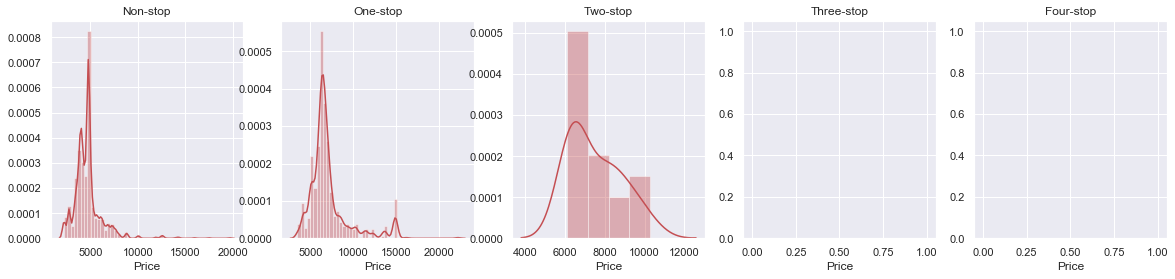

In [54]:
print('Indigo price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(indigo[indigo.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(indigo[indigo.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(indigo[indigo.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(indigo[indigo.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(indigo[indigo.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [55]:
ind1 = indigo[indigo.Total_Stops=='non-stop']
out1 = list(ind1[ind1.Price>12000].index)
ind2 = indigo[indigo.Total_Stops=='1 stop']
out2 = list(ind2[ind2.Price>15000].index)

In [56]:
out1,out2 

([837, 1887, 2085, 2146, 4282, 5385, 7134, 8305, 8522, 8712, 8934, 10536],
 [5847, 6857])

Jet Airways price distribution...



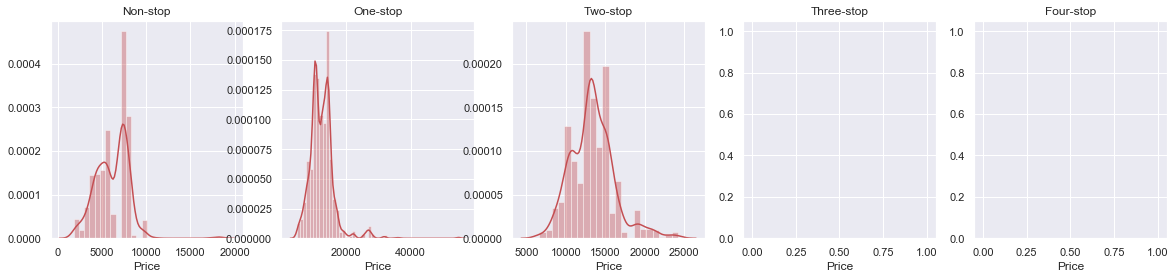

In [57]:
print('Jet Airways price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(jet[jet.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(jet[jet.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(jet[jet.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(jet[jet.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(jet[jet.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [58]:
jt = jet[jet.Total_Stops=='non-stop']
out3 = list(jt[jt.Price > 15000].index)
out3

[1942, 5306, 6484]

In [59]:
jt = jet[jet.Total_Stops== '1 stop']
list(jt[jt.Price>27000].index)

[628,
 946,
 1478,
 1654,
 2099,
 2108,
 2618,
 2693,
 3109,
 3698,
 4827,
 5011,
 5436,
 5659,
 5716,
 6573,
 6602,
 7721,
 8467,
 9016,
 9628,
 10185,
 10434]

In [60]:
out3 = out3 + list(jt[jt.Price>27000].index)
len(out3)

26

#### High Value Found for Jet Air

Jet Airways Business price distribution...



C:\Users\creat\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\creat\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


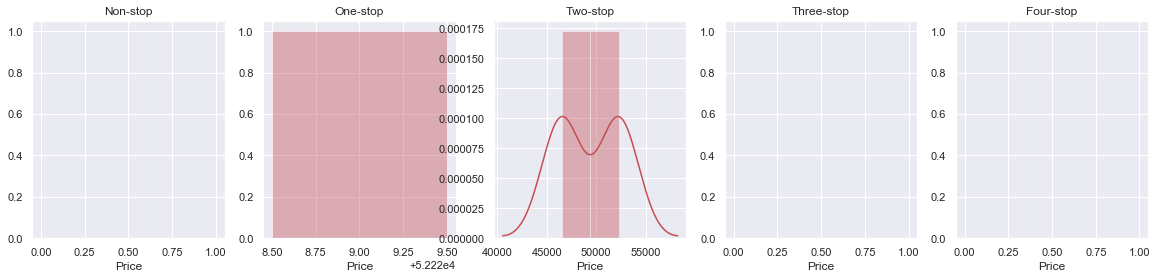

In [61]:
print('Jet Airways Business price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(jetbus[jetbus.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(jetbus[jetbus.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(jetbus[jetbus.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(jetbus[jetbus.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(jetbus[jetbus.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [62]:
jetbus[jetbus.Total_Stops=='1 stop']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5.0,1 stop,52229


I must have think whethere it will be outlier or not

In [63]:
jetbus[jetbus.Total_Stops=='1 stop'].index[0]

657

Spice Jet price distribution...



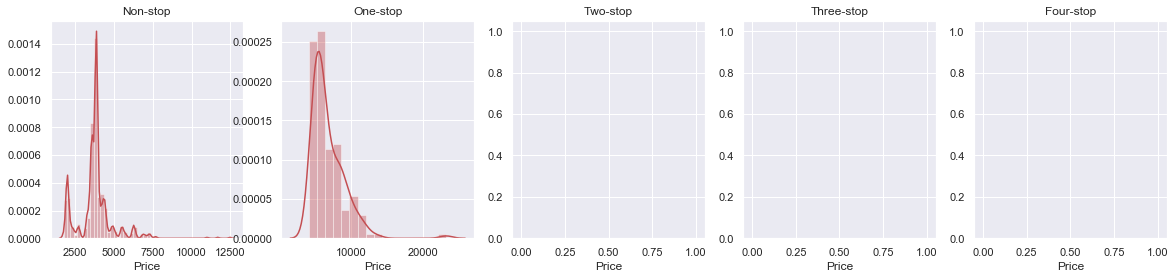

In [64]:
print('Spice Jet price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(spice[spice.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(spice[spice.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(spice[spice.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(spice[spice.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(spice[spice.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [65]:
sp1 = spice[spice.Total_Stops=='non-stop']
sp1.Price.min(),sp1.Price.max()

(1759, 12475)

In [66]:
ut = list(sp1[sp1.Price > 10000].index)
ut

[4196, 4907, 8031]

In [67]:
sp2 = spice[spice.Total_Stops=='1 stop']

In [68]:
out4 = list(sp2[sp2.Price > 13000].index)
out4 = ut + out4
out4

[4196, 4907, 8031, 1822, 5134]

Multiple Carrier price distribution...



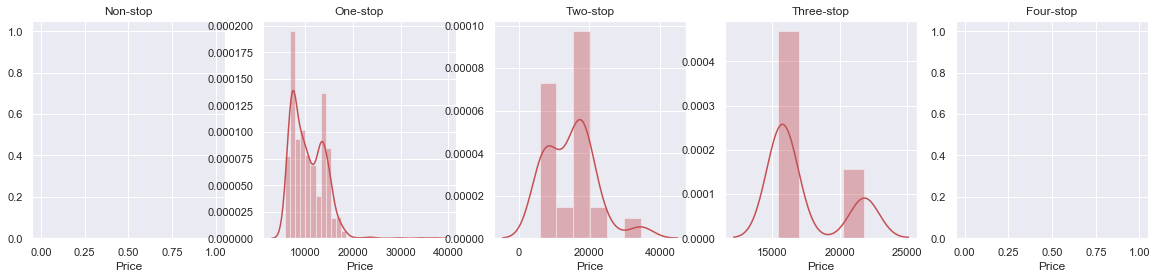

In [69]:
print('Multiple Carrier price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(mult[mult.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(mult[mult.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(mult[mult.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(mult[mult.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(mult[mult.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [70]:
mul = mult[mult.Total_Stops=='1 stop']

In [71]:
out5 = list(mul[mul.Price > 20000].index)
out5

[396, 1341, 4060, 6988, 7353, 8017, 10156]

Multiple Carrier Premium Econonomy price distribution...



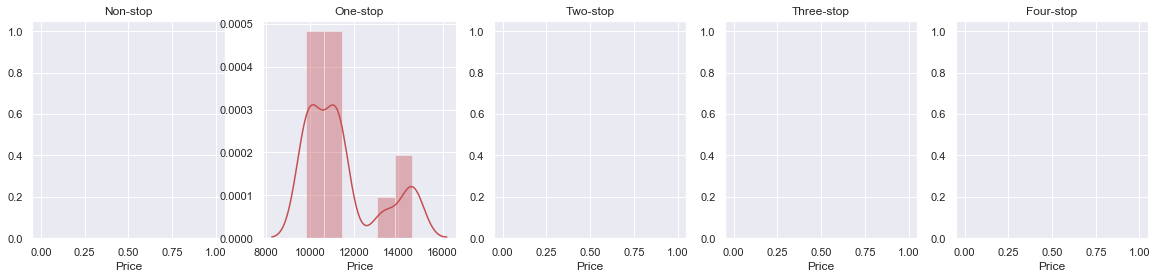

In [72]:
print('Multiple Carrier Premium Econonomy price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(multeco[multeco.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(multeco[multeco.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(multeco[multeco.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(multeco[multeco.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(multeco[multeco.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

Go Air price distribution...



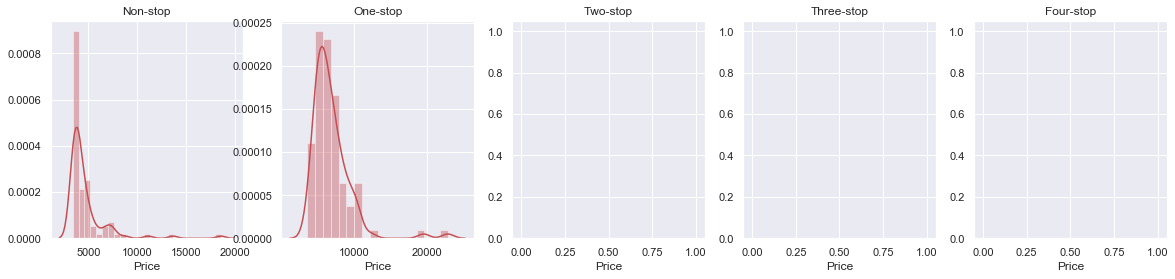

In [73]:
print('Go Air price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(go[go.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(go[go.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(go[go.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(go[go.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(go[go.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [74]:
g1 = go[go.Total_Stops=='non-stop']

In [75]:
out6 = list(g1[g1.Price > 10000].index)
out6

[1497, 1959, 5384]

In [76]:
g = go[go.Total_Stops=='1 stop']

In [77]:
out6 = out6 + list(g[g.Price > 14000].index)
out6

[1497, 1959, 5384, 20, 7117]

Vistara price distribution...



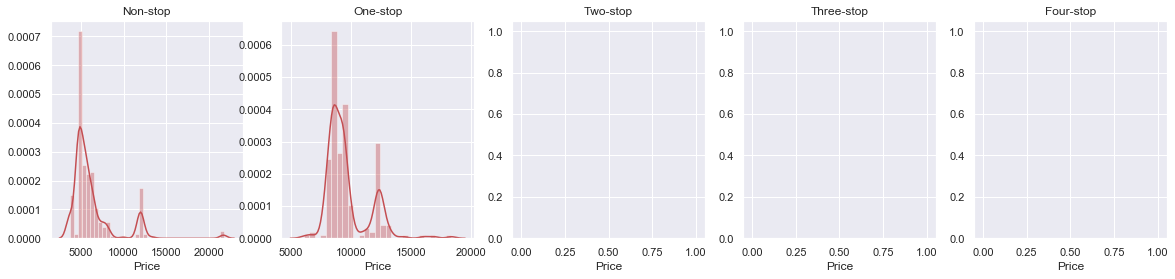

In [78]:
print('Vistara price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(vist[vist.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(vist[vist.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(vist[vist.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(vist[vist.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(vist[vist.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [79]:
v1 = vist[vist.Total_Stops=='non-stop']
out7 = list(v1[v1.Price > 13000].index)
out7

[5160, 6523, 9098, 9299]

In [80]:
v2 = vist[vist.Total_Stops=='1 stop']
out8 = list(v2[v2.Price > 15000].index)
out8

[544, 4533, 5876]

Vistara Premium Economy price distribution...



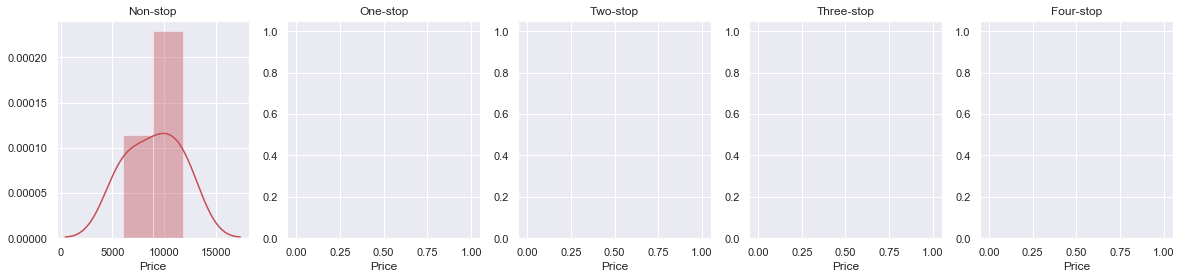

In [81]:
print('Vistara Premium Economy price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(visteco[visteco.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(visteco[visteco.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(visteco[visteco.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(visteco[visteco.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(visteco[visteco.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

Air Asia price distribution...



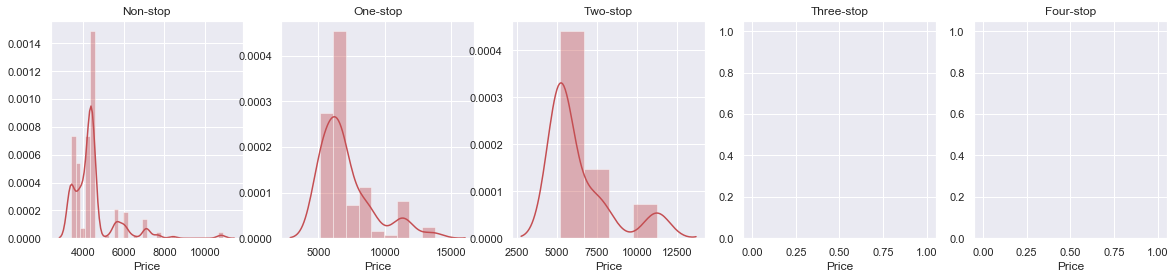

In [82]:
print('Air Asia price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(asia[asia.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(asia[asia.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(asia[asia.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(asia[asia.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(asia[asia.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [83]:
a = asia[asia.Total_Stops=='non-stop']
out9 = list(a[a.Price > 9000].index)
out9

[5961, 8119]

In [84]:
a1 = asia[asia.Total_Stops=='1 stop']
out10 = list(a1[a1.Price > 13000].index)
out10

[468, 1815, 6292]

Air India price distribution...



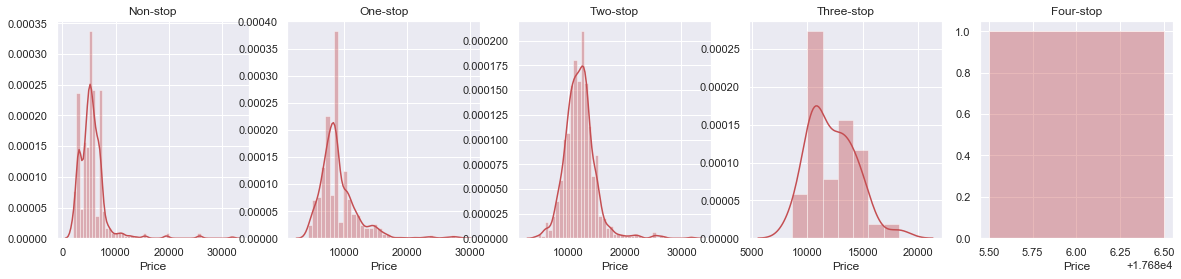

In [85]:
print('Air India price distribution...\n')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4)) 
sns.distplot(airind[airind.Total_Stops=='non-stop'].Price,ax=ax1,color='r')
sns.distplot(airind[airind.Total_Stops=='1 stop'].Price,ax=ax2,color='r')
sns.distplot(airind[airind.Total_Stops=='2 stops'].Price,ax=ax3,color='r')
sns.distplot(airind[airind.Total_Stops=='3 stops'].Price,ax=ax4,color='r')
sns.distplot(airind[airind.Total_Stops=='4 stops'].Price,ax=ax5,color='r')
ax1.set_title('Non-stop')
ax2.set_title('One-stop')
ax3.set_title('Two-stop')
ax4.set_title('Three-stop')
ax5.set_title('Four-stop')
plt.show()

In [86]:
airind[airind.Total_Stops=='4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9178,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29.0,4 stops,17686


In [87]:
ai = airind[airind.Total_Stops=='non-stop']
out10 = list(ai[ai.Price > 12000].index)
out10

[268, 2528, 2581, 2628, 4010, 7389, 8937, 9542, 10028, 10048]

In [88]:
ai1 = airind[airind.Total_Stops=='1 stop']
out11 = list(ai1[ai1.Price > 17000].index)
out11

[123, 2920, 3533, 4156, 5983, 7422, 9051, 9189, 9970, 10178]

Trujet price distribution/.........


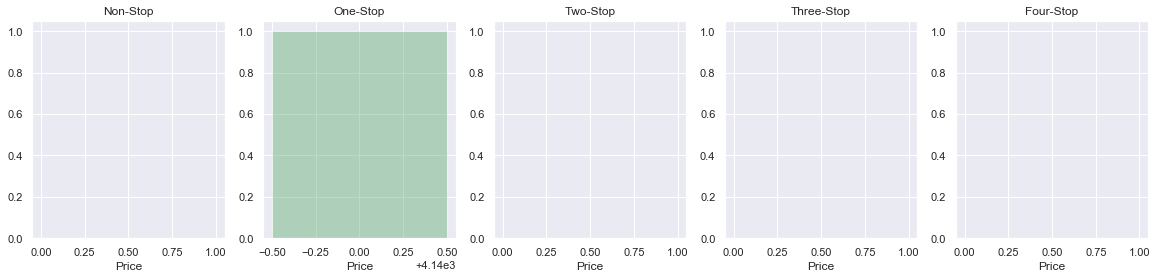

In [89]:
print('Trujet price distribution/.........')
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,4))
sns.distplot(Tru[Tru.Total_Stops == 'non-stop'].Price,ax=ax1,color = 'g')
sns.distplot(Tru[Tru.Total_Stops == '1 stop'].Price,ax=ax2,color = 'g')
sns.distplot(Tru[Tru.Total_Stops == '2 stops'].Price,ax=ax3,color = 'g')
sns.distplot(Tru[Tru.Total_Stops == '3 stops'].Price,ax=ax4,color = 'g')
sns.distplot(Tru[Tru.Total_Stops == '4 stops'].Price,ax=ax5,color = 'g')
ax1.set_title('Non-Stop')
ax2.set_title('One-Stop')
ax3.set_title('Two-Stop')
ax4.set_title('Three-Stop')
ax5.set_title('Four-Stop')
plt.show()

In [90]:
out = out1 + out2 + out3 + out4 + out5 + out6 + out7 + out8 + out9 + out10 + out11

In [91]:
out.sort()

In [92]:
outlier_index = []
for i in range((len(out)-1)):
    if out[i]!= out[i+1]:
        outlier_index.append(out[i])
        

In [93]:
len(outlier_index)

85

In [94]:
train.drop(outlier_index,0,inplace=True)

In [95]:
train.reset_index(drop=True,inplace=True)

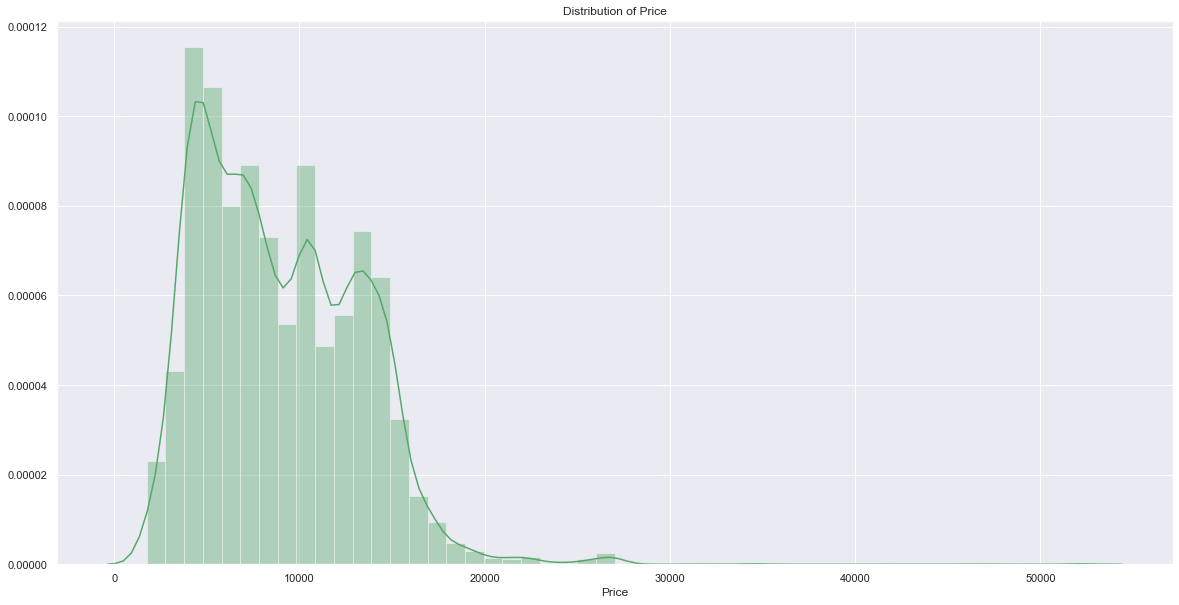

In [96]:
plt.figure(figsize=(20,10))
sns.distplot(train.Price,bins=50,color='g')
plt.title('Distribution of Price')
plt.show()

In [97]:
lst=[]
for index in range(len(train)):
    try:
        if train.Price[index] >30000:
            lst.append(index)
        else:
            pass
    except:
        print("value error..")

len(lst)

6

### I want to remove two outliers according to Price

In [98]:
train.drop(lst,0,inplace=True)

In [99]:
train.reset_index(drop=True,inplace=True)

### So, Manually all probable outliers removed

Seperating Price from train sets

In [100]:
ytrain = train.Price.copy()

In [101]:
train.drop('Price',1,inplace=True)

In [102]:
train.shape,ytrain.shape

((10587, 9), (10587,))

In [103]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.8,non-stop
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.0,2 stops


In [104]:
print(f'Mininum Price :Rs.{ytrain.min()}/- & Maximum Price :Rs.{ytrain.max()}/-')

Mininum Price :Rs.1759/- & Maximum Price :Rs.26890/-


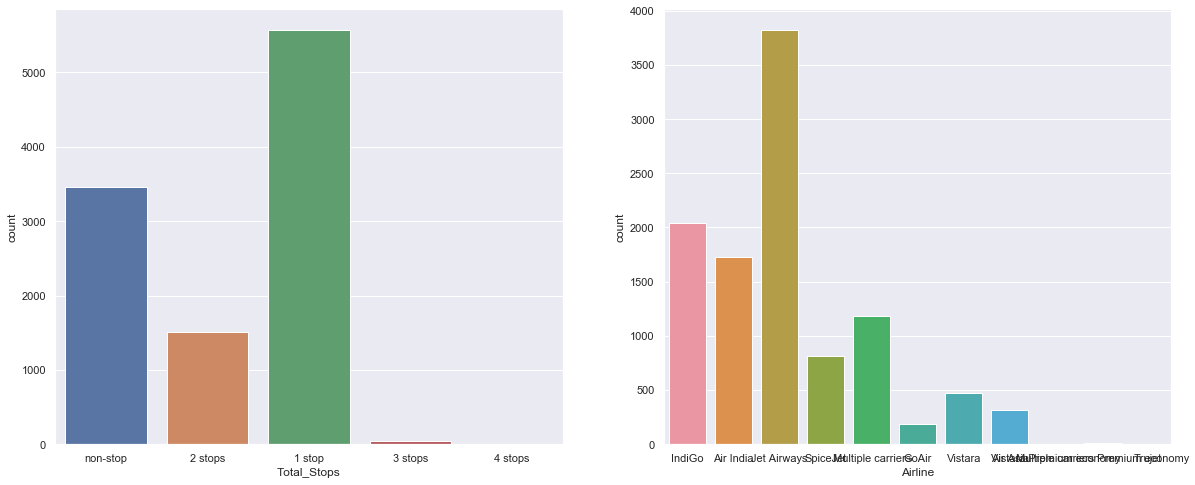

In [105]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.countplot(train.Total_Stops,ax=ax1)
sns.countplot(train.Airline,ax=ax2)
plt.show()

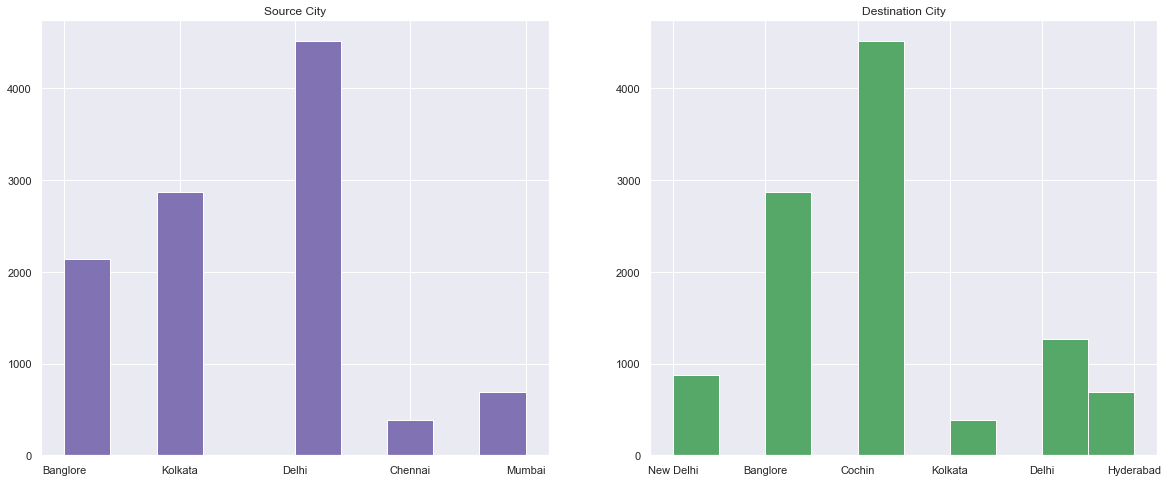

In [106]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax2.hist(train.Destination,color='g')
ax2.set_title('Destination City')
ax1.hist(train.Source,color='m')
ax1.set_title('Source City')
plt.show()

In [107]:
len(train), len(ytrain)

(10587, 10587)

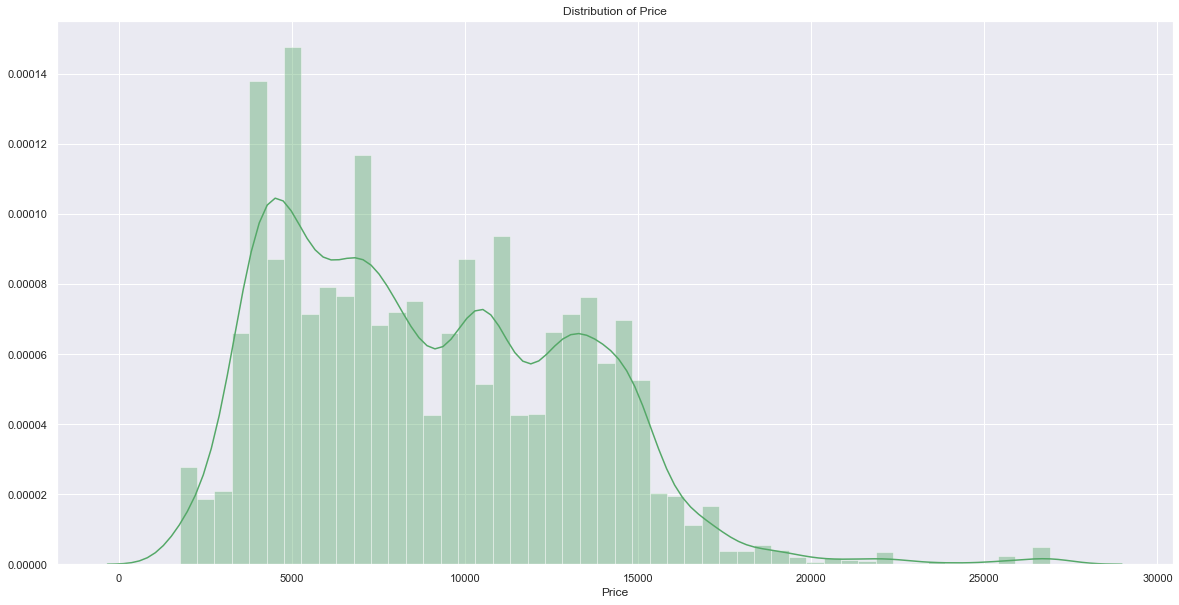

In [108]:
plt.figure(figsize=(20,10))
sns.distplot(ytrain,bins=50,color='g')
plt.title('Distribution of Price')
plt.show()

In [109]:
full_data = pd.concat([train,test],0).copy()

In [110]:
#train data + test data 
full_data.shape[0] == (len(train) + 2671) 

True

##### Remember train data length = 10542 and Test data length 2671


In [111]:
del train

---

In [112]:
full_data.shape

(13258, 9)

In [113]:
full_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.8,non-stop
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.0,2 stops


#####  *Here 1) Route,  2) Arrival_Time, & 3) Duration are not important cause Everything is totally depends upon Four factors 
1) Dep_Time  2) Source 3) Destination & 4) Total_Stops so, above three could be deleted

In [114]:
full_data.drop(['Route','Arrival_Time'],1,inplace = True)

In [115]:
full_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2.8,non-stop
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7.0,2 stops


As I found Jet Airbus and Spice Jet have high value so I will give it ti 2 value and others are to 1..  

Now, another Ordinal data is Total_Stops

In [116]:
full_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [117]:
dict2 = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [118]:
full_data['Total_Stops'] = full_data['Total_Stops'].map(dict2)

In [119]:
full_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2.8,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7.0,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19.0,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5.4,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4.8,1


Now I have to modify Dep_Time as Hour only cause minute is a part of hour by dividing 60 and adding to hour

In [120]:
hour = pd.to_datetime(full_data["Dep_Time"]).dt.hour
minute = pd.to_datetime(full_data["Dep_Time"]).dt.minute
hr = hour+round((minute/60),2)
full_data["Dep_Time"] = hr

In [121]:
full_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22.33,2.8,0
1,Air India,1/05/2019,Kolkata,Banglore,5.83,7.0,2


Now I will convert Date_of Journey to Day and Month

In [122]:
full_data['Day'] = pd.to_datetime(full_data.Date_of_Journey).apply(lambda x: x.day)

In [123]:
full_data['Month'] = pd.to_datetime(full_data.Date_of_Journey).apply(lambda x: x.month)

In [124]:
full_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22.33,2.8,0,24,3
1,Air India,1/05/2019,Kolkata,Banglore,5.83,7.0,2,5,1


In [125]:
full_data.drop(['Date_of_Journey','Duration'],1,inplace = True)

In [126]:
full_data.head(1)

,Airline,Source,Destination,Dep_Time,Total_Stops,Day,Month
0,IndiGo,Banglore,New Delhi,22.33,0,24,3


Now, I should go for one hot encoding for nominal datasets 1) Source  &  2) Destination

In [127]:
airline = pd.get_dummies(full_data.Airline,1,drop_first=True)
source = pd.get_dummies(full_data.Source,1,drop_first=True)
destin = pd.get_dummies(full_data.Destination,1,drop_first=True)

In [128]:
airline.head(1)

,1_Air India,1_GoAir,1_IndiGo,1_Jet Airways,1_Jet Airways Business,1_Multiple carriers,1_Multiple carriers Premium economy,1_SpiceJet,1_Trujet,1_Vistara,1_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0


In [129]:
source.head(1)

,1_Chennai,1_Delhi,1_Kolkata,1_Mumbai
0,0,0,0,0


In [130]:
destin.head(1)

,1_Cochin,1_Delhi,1_Hyderabad,1_Kolkata,1_New Delhi
0,0,0,0,0,1


In [131]:
full_data.head(2)

,Airline,Source,Destination,Dep_Time,Total_Stops,Day,Month
0,IndiGo,Banglore,New Delhi,22.33,0,24,3
1,Air India,Kolkata,Banglore,5.83,2,5,1


In [132]:
source.columns = ['Chennais','Delhis','Kolkatas','Mumbais']

In [133]:
destin.columns = ['Cochind', 'Delhid', 'Hyderabadd', 'Kolkatad', 'NewDelhid']

In [134]:
airline.columns = ['AirIndia','GoAir','IndiGo','JetAir','JetAirwaysBus','MultiCarr','MultiCarrEco',
                   'SpiceJet', 'Trujet','Vistara','VistaraPremEco']

Now, Join the nominal data sets

In [135]:
nominals = pd.concat([source,destin,airline],1).copy()

In [136]:
del source,destin,airline

In [137]:
nominals.head(2)

,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,Hyderabadd,Kolkatad,NewDelhid,AirIndia,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [138]:
nominals.shape

(13258, 20)

#### Remember

In [139]:
source_col = list(full_data.Source.unique())
source_col

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

In [140]:
dest_col = list(full_data.Destination.unique())
dest_col

['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

In [141]:
air_col = list(full_data.Airline.unique())
air_col

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Multiple carriers Premium economy',
 'Trujet',
 'Jet Airways Business']

so, others full datasets are 1)Date_of_Journey 2)Dep_Time 3) Total_Stops   

In [142]:
full_data.head(1)

,Airline,Source,Destination,Dep_Time,Total_Stops,Day,Month
0,IndiGo,Banglore,New Delhi,22.33,0,24,3


In [143]:
nominals.head(2)

,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,Hyderabadd,Kolkatad,NewDelhid,AirIndia,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [144]:
full_data.drop(['Source','Destination','Airline'],1,inplace=True) #no need of these columns more..

Now, I will join these to data sets namely 1. Full_data and 2. nominal data

In [145]:
df = pd.concat([full_data,nominals],1).copy()

In [146]:
df.head(2)

,Dep_Time,Total_Stops,Day,Month,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,...,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,22.33,0,24,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.83,2,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df.shape

(13258, 24)

In [148]:
del nominals,full_data

In [149]:
***

SyntaxError: invalid syntax (<ipython-input-149-4d49d8944364>, line 1)

#### Spliting original train datasets and test datasets 

In [150]:
xtrain = df.iloc[:10587].copy()

In [151]:
xtrain.shape, ytrain.shape

((10587, 24), (10587,))

In [152]:
xtest = df.iloc[10587:].copy()

In [153]:
xtest.shape

(2671, 24)

In [154]:
del df

## Making of Model

In [155]:
xtrain.head(2)

,Dep_Time,Total_Stops,Day,Month,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,...,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,22.33,0,24,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.83,2,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
xtest.head(2)

,Dep_Time,Total_Stops,Day,Month,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,...,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,17.50,1,6,6,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6.33,1,5,12,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [157]:
ytrain.shape

(10587,)

In [158]:
columns = list(xtrain.columns)
print('The input Columns would be:\n\n',columns) 

The input Columns would be:
 ['Dep_Time', 'Total_Stops', 'Day', 'Month', 'Chennais', 'Delhis', 'Kolkatas', 'Mumbais', 'Cochind', 'Delhid', 'Hyderabadd', 'Kolkatad', 'NewDelhid', 'AirIndia', 'GoAir', 'IndiGo', 'JetAir', 'JetAirwaysBus', 'MultiCarr', 'MultiCarrEco', 'SpiceJet', 'Trujet', 'Vistara', 'VistaraPremEco']


In [159]:
print('Actual Destinations are:\n\n',source_col)

Actual Sources are :
 ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']


In [160]:
print('Actual Destinations are:\n\n',dest_col) 

Actual Destinations are:
 ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']


In [161]:
print('Actual Airlines are :\n\n',air_col) 

Actual Airlines are :
 ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Multiple carriers Premium economy', 'Trujet', 'Jet Airways Business']


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain,test_size = 0.20, random_state = 10)
def Rfr():
    model =RandomForestRegressor()
    model.fit(X_train, y_train)
    pr = model.predict(X_test)
    acc = metrics.r2_score(y_test, pr)
    return acc  

Rfr()

C:\Users\creat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8308902583192476

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [173]:
model =RandomForestRegressor()

In [174]:
grid = {'n_estimators':[130,140,150,160,170,180],
               'max_depth': [14,15,16,17,18],
               'min_samples_split':[9,10,11]}

In [175]:
rfr = RandomizedSearchCV(estimator = model, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 10, verbose = 1, n_jobs = 1)

In [176]:
rfr.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=

In [177]:
rfr.best_params_

{'n_estimators': 150, 'min_samples_split': 11, 'max_depth': 16}

In [ ]:
***

In [178]:
model =RandomForestRegressor(n_estimators= 150, min_samples_split= 11, max_depth= 16)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [179]:
pred = model.predict(X_test)

In [182]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 1629.495809090987


In [183]:
print('Test data Accuracy :',round(metrics.r2_score(y_test, pred)*100,2),'%')

Test data Accuracy : 85.09 %


In [184]:
pred_train = model.predict(X_train)

In [185]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

RMSE: 1362.404741359859


In [186]:
print('Train data Accuracy :',round(metrics.r2_score(y_train, pred_train)*100,2),'%')

Train data Accuracy : 89.37 %


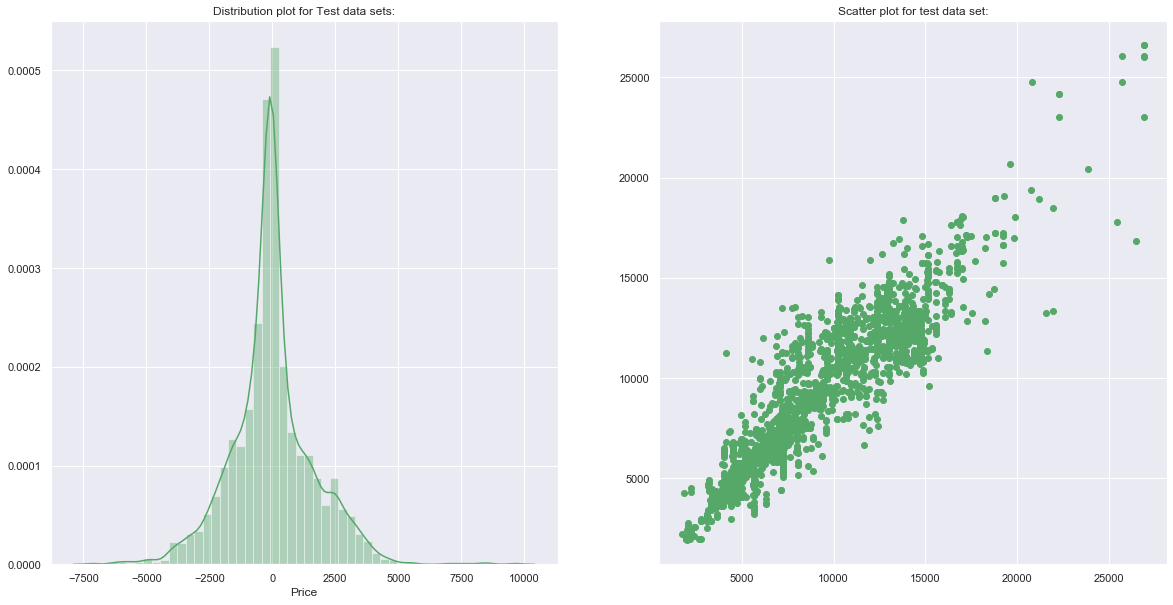

In [187]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.distplot((y_test- pred),color='g',ax=ax1)
ax1.set_title("Distribution plot for Test data sets:")
ax2.scatter(y_test, pred,color='g')
ax2.set_title("Scatter plot for test data set:")
plt.show()

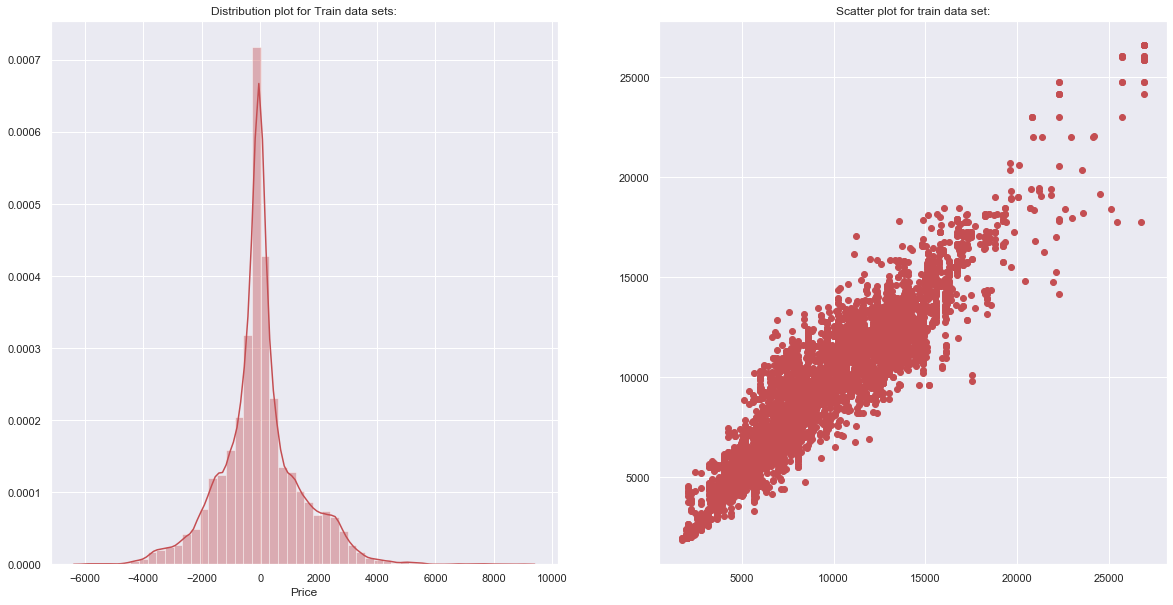

In [188]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.distplot((y_train- pred_train),color='r',ax=ax1)
ax1.set_title("Distribution plot for Train data sets:")
ax2.scatter(y_train, pred_train,color='r')
ax2.set_title("Scatter plot for train data set:")
plt.show()

In [ ]:
***

In [189]:
import pickle
# open a file, where you ant to store the data
file = open('flight_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [190]:
del model,X_train,y_train

In [191]:
import pickle
mod = open('flight_model.pkl','rb')
model = pickle.load(mod)

In [192]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [193]:
testPred = model.predict(X_test) 

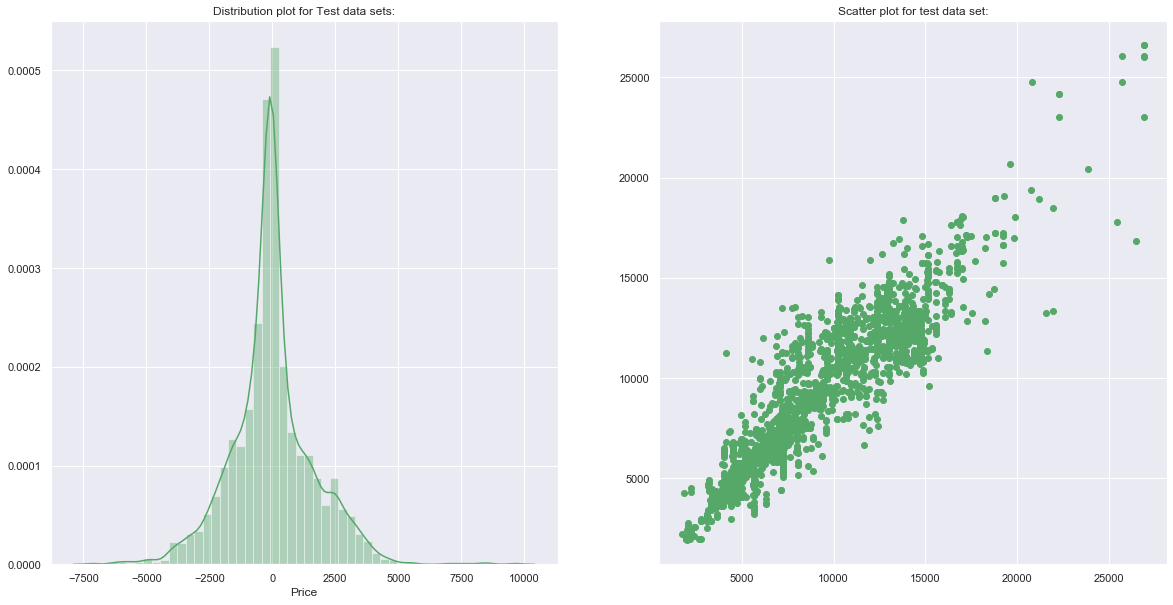

In [194]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.distplot((y_test- testPred),color='g',ax=ax1)
ax1.set_title("Distribution plot for Test data sets:")
ax2.scatter(y_test, testPred,color='g')
ax2.set_title("Scatter plot for test data set:")
plt.show()

In [195]:
print('Test data Accuracy :',round(metrics.r2_score(y_test, testPred)*100,2),'%')
print('\nRMSE:', np.sqrt(metrics.mean_squared_error(y_test, testPred)))

Test data Accuracy : 85.09 %

RMSE: 1629.495809090987


In [196]:
original_test_data = xtest.copy()
original_test_data.shape

(2671, 24)

In [197]:
xtest.head(2)

,Dep_Time,Total_Stops,Day,Month,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,...,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,17.50,1,6,6,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6.33,1,5,12,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [198]:
del X_test,y_test

So, I have only two thinks in my memory 1)model that I loaded from pickle file  and  2) original_test_data

In [199]:
test_prediction = model.predict(xtest)

In [200]:
lst = list(test_prediction)

In [201]:
def Data(lst):
    lt = []
    for x in lst:
        lt.append(int(round(x)))
    return lt

In [202]:
lt = Data(lst)

In [203]:
def prediction(lt,index=0):
    try:
        if (0 <= index < len(lt)):
            print(f'Information of the Flight is :\n')
            print(test.iloc[index])
            print(f"\nPredicted Flight Price is INR Rs.{lt[index]}/-")
        else:
            print(f"Put index value between Zero and 2670 but you have entered:{index}")
    except:
        print("Value error..")
        
    

In [204]:
prediction(lt,index=1200)

Information of the Flight is :

Airline            Multiple carriers
Date_of_Journey            3/03/2019
Source                         Delhi
Destination                   Cochin
Route                DEL → BOM → COK
Dep_Time                       09:55
Arrival_Time            01:35 04 Mar
Duration                          15
Total_Stops                   1 stop
Name: 1200, dtype: object

Predicted Flight Price is INR Rs.15693/-


##### Making a data frame for prediction data set

In [205]:
dict = {'Id':(1+test.index), 'PredictedPrice':lt}

In [206]:
Test_predicted = pd.DataFrame(dict)
Test_predicted.PredictedPrice.min(),Test_predicted.PredictedPrice.max()

(1933, 26589)

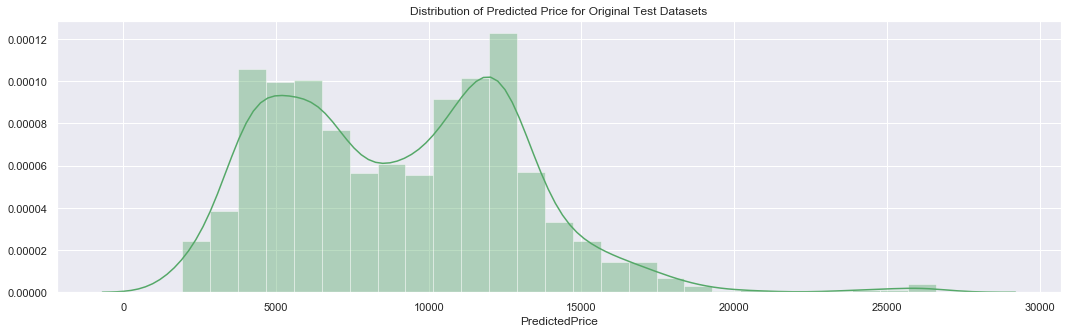

In [207]:
plt.figure(figsize=(18,5))
sns.distplot(Test_predicted.PredictedPrice,color='g')
plt.title('Distribution of Predicted Price for Original Test Datasets')
plt.show()

In [208]:
prediction(lt,index=2600)

Information of the Flight is :

Airline                  Air India
Date_of_Journey          1/06/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → MAA → COK
Dep_Time                     06:05
Arrival_Time          09:25 02 Jun
Duration                        27
Total_Stops                 1 stop
Name: 2600, dtype: object

Predicted Flight Price is INR Rs.8009/-


In [209]:
prediction(lt,index=1200)

Information of the Flight is :

Airline            Multiple carriers
Date_of_Journey            3/03/2019
Source                         Delhi
Destination                   Cochin
Route                DEL → BOM → COK
Dep_Time                       09:55
Arrival_Time            01:35 04 Mar
Duration                          15
Total_Stops                   1 stop
Name: 1200, dtype: object

Predicted Flight Price is INR Rs.15693/-


In [210]:
input_data = list(original_test_data.columns)

In [211]:
original_test_data.head(2)

,Dep_Time,Total_Stops,Day,Month,Chennais,Delhis,Kolkatas,Mumbais,Cochind,Delhid,...,GoAir,IndiGo,JetAir,JetAirwaysBus,MultiCarr,MultiCarrEco,SpiceJet,Trujet,Vistara,VistaraPremEco
0,17.50,1,6,6,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6.33,1,5,12,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [212]:
del original_test_data

#### prediction for [Type-> Non-Stop, Air line-> GoAir, Time-> 18:30, Day-> 15th june, From-> Kolkata To-> Delhi]

In [213]:
rs = model.predict([[18.50,0,15,6,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0]]) 
print(f'Predicted Price is Rs.{int(rs)}/- only')


Predicted Price is Rs.3797/- only


### Deployment method in flask

In [214]:
input_data

['Dep_Time',
 'Total_Stops',
 'Day',
 'Month',
 'Chennais',
 'Delhis',
 'Kolkatas',
 'Mumbais',
 'Cochind',
 'Delhid',
 'Hyderabadd',
 'Kolkatad',
 'NewDelhid',
 'AirIndia',
 'GoAir',
 'IndiGo',
 'JetAir',
 'JetAirwaysBus',
 'MultiCarr',
 'MultiCarrEco',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'VistaraPremEco']

In [215]:
source_col

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

In [216]:
dest_col

['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

In [217]:
dict2

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [218]:
air_col

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Multiple carriers Premium economy',
 'Trujet',
 'Jet Airways Business']

#### Method for [TotalStop-> Non-Stop,DepTime-> 20:30, Day-> 15th, Month-> Feb, From-> Bangalore To-> Kolkata, , Air line-> GoAir]

In [219]:
#Logic
DepTime = [20.50]
TotalStop = [0]
Day = [15]
Month = [2]

#if Source =  Banglore
FromCity = [0,0,0,0]
#if Source =  Chennai
#FromCity = [1,0,0,0]
#if Source =  Delhi
#FromCity = [0,1,0,0]
#if Source =  Kolkata
#FromCity = [0,0,1,0]
#if Source =  Mumbai
#FromCity = [0,0,0,1]

#if Destination = Bangalore
#ToCity = [0,0,0,0,0]
#if Destination = Cohin
#ToCity = [1,0,0,0,0]
#if Destination = Delhi
#ToCity = [0,1,0,0,0]
#if Destination = Hydrabad
#ToCity = [0,0,1,0,0]
#if Destination = Kolkata 
ToCity = [0,0,0,1,0]
#if Destination = NewDelhi
#ToCity = [0,0,0,0,1]

#Airline
#if Air Asia
#Airline = [0,0,0,0,0,0,0,0,0,0,0]
#if AirIndia
#Airline = [1,0,0,0,0,0,0,0,0,0,0]
#if GoAir
Airline = [0,1,0,0,0,0,0,0,0,0,0]
#if IndiGo
#Airline = [0,0,1,0,0,0,0,0,0,0,0]
#if JetAir
#Airline = [0,0,0,1,0,0,0,0,0,0,0]
#if JetAirwaysBus
#Airline = [0,0,0,0,1,0,0,0,0,0,0]
#if MultiCarr
#Airline = [0,0,0,0,0,1,0,0,0,0,0]
#if MultiCarrEco
#Airline = [0,0,0,0,0,0,1,0,0,0,0]
#if SpiceJet
#Airline = [0,0,0,0,0,0,0,1,0,0,0]
#if Trujet
#Airline = [0,0,0,0,0,0,0,0,1,0,0]
#if Vistara
#Airline = [0,0,0,0,0,0,0,0,0,1,0]
#if VistaraPremEco
#Airline = [0,0,0,0,0,0,0,0,0,0,1]

### PREDICTION
inputList = [DepTime +TotalStop +Day +Month +FromCity +ToCity +Airline]
pred = model.predict(inputList)
print(f'Predicted Price is Rs.{int(pred)}/- only')

Predicted Price is Rs.4379/- only


## Apply in pycharm or sublime or visual-code or spider or any other IDLE

---